In [189]:
%pylab inline
import numpy as np
import theano
import theano.tensor as T
from theano import pp
from scipy.spatial.distance import pdist, cdist
import sklearn.datasets
import sys
import cPickle as pickle
import time
sys.path.append("../")
import sgd
import topogen
reload(topogen)

Populating the interactive namespace from numpy and matplotlib


<module 'topogen' from '../topogen.pyc'>

In [190]:

np.random.seed(10)
N = 200
DIM = 3
SCALE = 40.0
XINIT_VAR = 5.0
KERN_SIZE = 1.0

# fake data
#xtrue = np.random.normal(0, XINIT_VAR, (N, DIM))
#xtrue = topogen.sample_sphere(N, DIM)
xtrue, t = sklearn.datasets.make_swiss_roll(n_samples=N, noise=0.0, random_state=None)
xtrue = xtrue / np.max(xtrue)

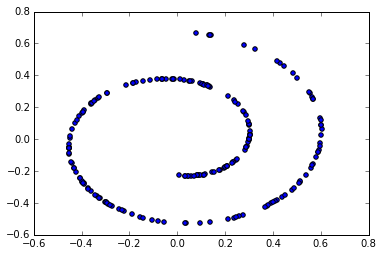

In [191]:
pylab.scatter(xtrue[:, 0], xtrue[:, 2])

In [187]:

def sim_func(xv, xconst):
    similarity = np.exp(-((xv -xconst)**2).sum(1)/KERN_SIZE)
    return similarity 
a=np.array([1.0, 2.0])
b =  np.array([[1.0, 2.0], [1.0,3.0]])
print a, b
        
print sim_func(a, b)

[ 1.  2.] [[ 1.  2.]
 [ 1.  3.]]
[ 1.          0.36787944]


In [188]:
np.random.seed(20)

reload(sgd)

def sim_func(xv, xconst):
    if isinstance(xv, np.ndarray):
        e = np.exp
    else:
        e = T.exp
    similarity = e(-((xv -xconst)**2).sum(1)/KERN_SIZE)
    return similarity 

def norm_unitvar_ll(obs, mu):
    return -(obs - mu)**2



def forward_model_lamb(SCALE, x ):
    sim_matrix = np.zeros((N, N))
    for xi in range(N):
        sim_matrix[xi] = sim_func(x[xi], x)
    sim_matrix[np.diag_indices(N)] = 0.0
    obs = np.random.normal(sim_matrix, 0.00001)
    return obs


obs = forward_model_lamb(SCALE, xtrue)

xinit = np.random.normal(0, XINIT_VAR, (N, DIM))


val_present = np.random.rand(N, N) < 0.80



res = sgd.run_sgd(sim_func, norm_unitvar_ll, xinit, obs, 
       val_present, ITERS=2000)




0 -15687.6592807 0.000811918576558 min
100 -15341.9369839 0.0524544517199 min
200 -15335.114092 0.104366886616 min
300 -15182.9300682 0.156218818823 min
400 -15174.8120302 0.207948950926 min
500 -15174.8056396 0.259596602122 min
600 -15174.8036066 0.31115805308 min
700 -15174.8009482 0.362824670474 min
800 -15174.7987869 0.414493866762 min
900 -15174.7896244 0.466172369321 min
1000 -15167.3878095 0.517824602127 min
1100 -15167.3844764 0.569748485088 min
1200 -15167.381811 0.62169115146 min
1300 -15167.3796643 0.6736703674 min
1400 -15167.3767309 0.725578884284 min
1500 -15167.3740695 0.77764406999 min
1600 -15167.3716898 0.829626786709 min
1700 -15167.3685934 0.881585935752 min
1800 -15167.3658451 0.933466084798 min
1900 -15167.3631413 0.985222820441 min


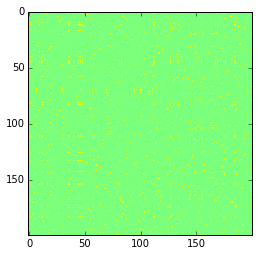

In [192]:
obs_est = forward_model_lamb(SCALE, res['x_est'])
VMIN = -3
VMAX = 3
pylab.imshow(obs_est, interpolation='nearest', vmin=VMIN, vmax=VMAX)

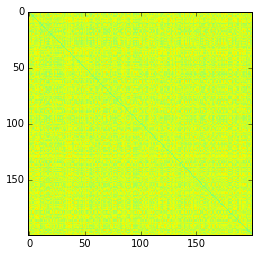

In [193]:
pylab.imshow(obs, interpolation='nearest', vmin=VMIN, vmax=VMAX)

In [194]:
missing_pos = np.argwhere(val_present < 1)
true_vals = obs[missing_pos[:, 0], missing_pos[:, 1]]
est_vals = obs_est[missing_pos[:, 0], missing_pos[:, 1]]
print len(true_vals)
print len(est_vals)
pylab.figure(figsize=(20, 10))
pylab.plot(true_vals)
pylab.scatter(range(len(est_vals)), est_vals, c='r')
print len(missing_pos)/(400*400.)
pylab.xlim(0, 400)

8011
8011
0.05006875


(0, 400)

(-1, 1)

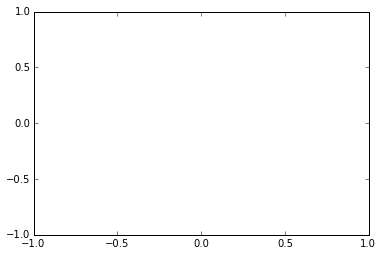

In [195]:
x_est = res['x_est']
pylab.scatter(x_est[:, 0], x_est[:, 2])
pylab.xlim(-1, 1)
pylab.ylim(-1, 1)

(-1, 1)

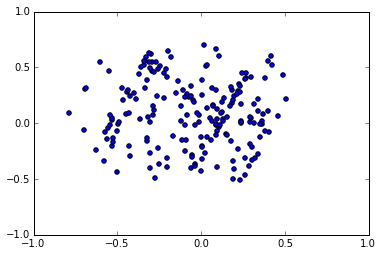

In [182]:
from sklearn import manifold
mds = manifold.MDS(3, max_iter=100, n_init=1)
Y = mds.fit_transform(res['x_est'])
pylab.scatter(Y[:, 0], Y[:, 2])
pylab.xlim(-1, 1)
pylab.ylim(-1, 1)